In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st

In [2]:
merch_sales = pd.read_csv('/content/merch_sales_data.csv')
merch_sales

,Order ID,Order Date,Product ID,Product Category,Buyer Gender,Buyer Age,Order Location,International Shipping,Sales Price,Shipping Charges,Sales per Unit,Quantity,Total Sales,Rating,Review
0,189440,2024-07-21,BF1543,Clothing,Male,30,New Jersey,No,100,0,100,1,100,4,The delivery team handled the product with care.
1,187385,2024-07-20,BF1543,Clothing,Male,32,Las Vegas,No,100,0,100,1,100,3,Had slight delays but the product was in good ...
2,181844,2024-07-21,BF1544,Other,Female,26,Cardiff,Yes,9,40,49,1,49,2,Waste of Money.
3,197934,2024-08-19,BF1544,Other,Male,28,Pittsburgh,No,9,0,9,2,18,3,Had slight delays but the product was in good ...
4,122470,2024-01-06,BF1545,Other,Female,19,Miami,No,10,0,10,3,30,5,Lack of delivery delays is greatly appreciated.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7389,136943,2023-12-10,BF1548,Clothing,Male,23,Las Vegas,No,65,0,65,1,65,4,The product was affordable here compared to ot...
7390,172276,2024-01-24,BF1546,Clothing,Female,26,Manchester,Yes,118,40,158,1,158,4,Exquisite craftsmanship here is absolutely app...
7391,160191,2023-12-19,BF1552,Ornaments,Male,19,Miami,No,45,0,45,1,45,2,Waste of Money.
7392,195268,2023-12-07,BF1555,Other,Male,34,Miami,No,23,0,23,1,23,5,The product was affordable here compared to ot...


In [3]:
merch_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7394 entries, 0 to 7393
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                7394 non-null   int64 
 1   Order Date              7394 non-null   object
 2   Product ID              7394 non-null   object
 3   Product Category        7394 non-null   object
 4   Buyer Gender            7391 non-null   object
 5   Buyer Age               7394 non-null   int64 
 6   Order Location          7394 non-null   object
 7   International Shipping  7391 non-null   object
 8   Sales Price             7394 non-null   int64 
 9   Shipping Charges        7394 non-null   int64 
 10  Sales per Unit          7394 non-null   int64 
 11  Quantity                7394 non-null   int64 
 12  Total Sales             7394 non-null   int64 
 13  Rating                  7394 non-null   int64 
 14  Review                  7394 non-null   object
dtypes: i

In [4]:
merch_sales['Order Date'] = pd.to_datetime(merch_sales['Order Date'], format="%Y-%m-%d")

In [5]:
merch_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7394 entries, 0 to 7393
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Order ID                7394 non-null   int64         
 1   Order Date              7394 non-null   datetime64[ns]
 2   Product ID              7394 non-null   object        
 3   Product Category        7394 non-null   object        
 4   Buyer Gender            7391 non-null   object        
 5   Buyer Age               7394 non-null   int64         
 6   Order Location          7394 non-null   object        
 7   International Shipping  7391 non-null   object        
 8   Sales Price             7394 non-null   int64         
 9   Shipping Charges        7394 non-null   int64         
 10  Sales per Unit          7394 non-null   int64         
 11  Quantity                7394 non-null   int64         
 12  Total Sales             7394 non-null   int64   

In [6]:
merch_sales.describe()

,Order ID,Order Date,Buyer Age,Sales Price,Shipping Charges,Sales per Unit,Quantity,Total Sales,Rating
count,7394.000000,7394,7394.000000,7394.000000,7394.000000,7394.000000,7394.000000,7394.000000,7394.000000
mean,159736.708547,2024-05-02 16:08:53.621855744,26.455099,55.161077,14.638896,69.799973,1.668245,115.847309,3.499189
min,120005.000000,2023-11-05 00:00:00,18.000000,9.000000,0.000000,9.000000,1.000000,9.000000,1.000000
25%,139895.750000,2024-02-02 00:00:00,22.000000,15.000000,0.000000,20.000000,1.000000,40.000000,3.000000
50%,159578.500000,2024-04-30 00:00:00,26.000000,65.000000,0.000000,65.000000,1.000000,90.000000,4.000000
75%,179869.750000,2024-07-31 00:00:00,31.000000,97.000000,40.000000,100.000000,2.000000,137.000000,5.000000
max,199994.000000,2024-11-04 00:00:00,35.000000,130.000000,100.000000,230.000000,5.000000,1000.000000,5.000000
std,23040.222526,NaN,5.208588,39.572788,24.816889,46.703049,1.081377,118.072835,1.389537


In [7]:
merch_sales.isna().sum()

,0
Order ID,0
Order Date,0
Product ID,0
Product Category,0
Buyer Gender,3
Buyer Age,0
Order Location,0
International Shipping,3
Sales Price,0
Shipping Charges,0


In [8]:
merch_sales['Buyer Gender'].fillna(merch_sales['Buyer Gender'].mode()[0], inplace=True)
merch_sales['International Shipping'].fillna(merch_sales['International Shipping'].mode()[0], inplace=True)

<ipython-input-8-1e76659ecb59>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merch_sales['Buyer Gender'].fillna(merch_sales['Buyer Gender'].mode()[0], inplace=True)
<ipython-input-8-1e76659ecb59>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].m

In [9]:
merch_sales.isna().sum()

,0
Order ID,0
Order Date,0
Product ID,0
Product Category,0
Buyer Gender,0
Buyer Age,0
Order Location,0
International Shipping,0
Sales Price,0
Shipping Charges,0


In [10]:
# Mengecek apakah ada duplicate di seluruh kolom
check_duplicate = merch_sales.duplicated().sum()

print(f"Jumlah data yang terduplikat = {check_duplicate}")

Jumlah data yang terduplikat = 1


In [11]:
merch_sales = merch_sales.drop_duplicates()

In [12]:
check_duplicate = merch_sales.duplicated().sum()

print(f"Jumlah data yang terduplikat = {check_duplicate}")

Jumlah data yang terduplikat = 0


In [13]:
merch_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7393 entries, 0 to 7393
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Order ID                7393 non-null   int64         
 1   Order Date              7393 non-null   datetime64[ns]
 2   Product ID              7393 non-null   object        
 3   Product Category        7393 non-null   object        
 4   Buyer Gender            7393 non-null   object        
 5   Buyer Age               7393 non-null   int64         
 6   Order Location          7393 non-null   object        
 7   International Shipping  7393 non-null   object        
 8   Sales Price             7393 non-null   int64         
 9   Shipping Charges        7393 non-null   int64         
 10  Sales per Unit          7393 non-null   int64         
 11  Quantity                7393 non-null   int64         
 12  Total Sales             7393 non-null   int64        

In [41]:
merch_sales.select_dtypes(include='object').describe()

,Product ID,Product Category,Buyer Gender,Order Location,International Shipping,Review
count,7393,7393,7393,7393,7393,7393
unique,13,3,2,25,2,29
top,BF1548,Clothing,Male,New Jersey,No,Lack of delivery delays is greatly appreciated.
freq,1497,3703,5188,434,5140,466


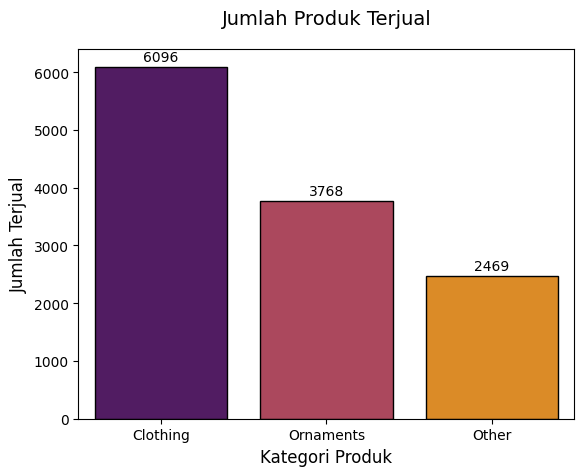

In [14]:
product_counts = merch_sales.groupby('Product Category')['Quantity'].sum().reset_index()

ax = sns.barplot(
    x='Product Category',
    y='Quantity',
    data=product_counts,
    hue='Product Category',
    palette='inferno',
    edgecolor='black'
)

for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.0f}',
        (p.get_x() + p.get_width()/2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 7),
        textcoords='offset points'
    )

plt.title('Jumlah Produk Terjual', pad=18, fontsize=14)
plt.xlabel('Kategori Produk', fontsize=12)
plt.ylabel('Jumlah Terjual', fontsize=12)
plt.xticks(ticks=[0,1,2], labels=['Clothing', 'Ornaments', 'Other'])
plt.show()

<Axes: ylabel='count'>

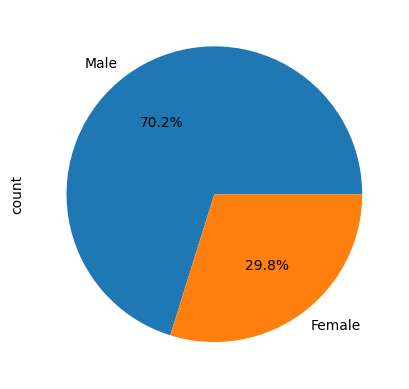

In [15]:
merch_sales['Buyer Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')

<Axes: ylabel='count'>

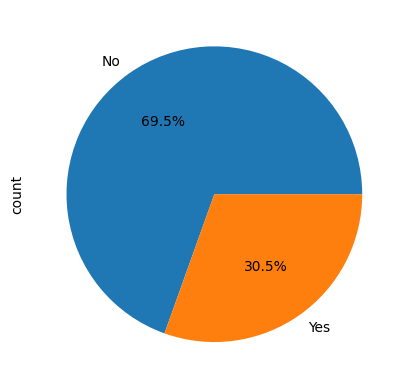

In [16]:
merch_sales['International Shipping'].value_counts().plot(kind='pie', autopct='%1.1f%%')

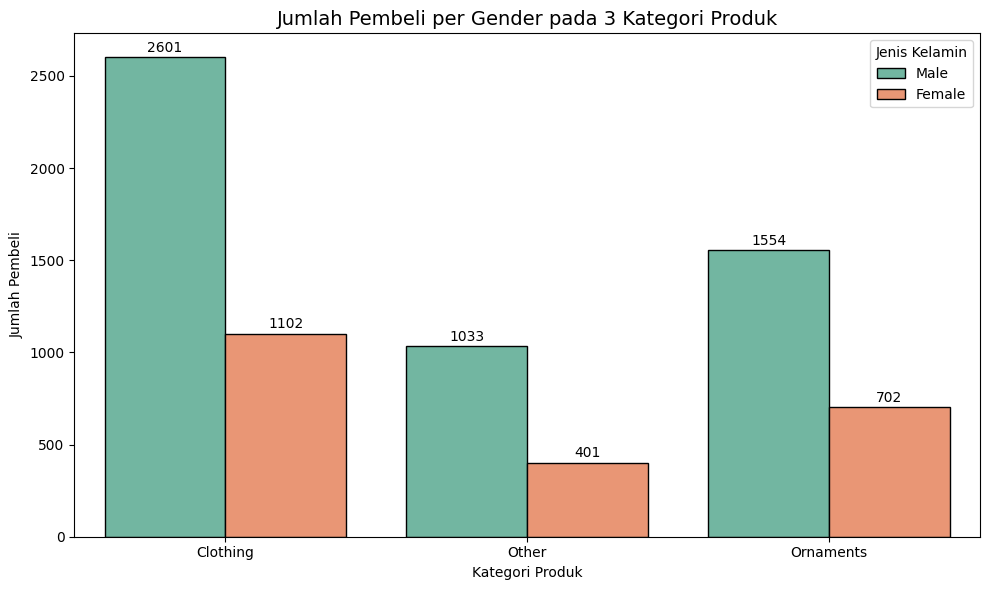

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ambil hanya 3 kategori produk yang ingin ditampilkan
top_3_categories = merch_sales['Product Category'].value_counts().nlargest(3).index
filtered_data = merch_sales[merch_sales['Product Category'].isin(top_3_categories)]

# Buat bar chart
plt.figure(figsize=(10,6))
ax = sns.countplot(
    data=filtered_data,
    x='Product Category',
    hue='Buyer Gender',
    palette='Set2',
    edgecolor='black'
)

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(
            f'{int(p.get_height())}',
            (p.get_x() + p.get_width()/2., p.get_height()),
            ha='center',
            va='center',
            xytext=(0, 7),
            textcoords='offset points'
        )


plt.title('Jumlah Pembeli per Gender pada 3 Kategori Produk', fontsize=14)
plt.xlabel('Kategori Produk')
plt.ylabel('Jumlah Pembeli')
plt.legend(title='Jenis Kelamin')
plt.tight_layout()
plt.show()


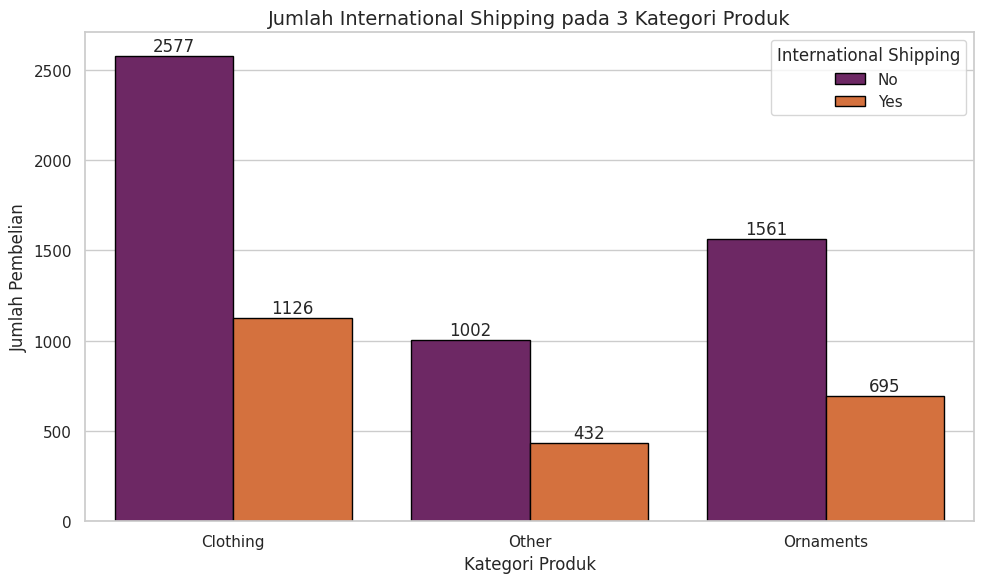

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ambil hanya 3 kategori produk yang ingin ditampilkan
top_3_categories = merch_sales['Product Category'].value_counts().nlargest(3).index
filtered_data = merch_sales[merch_sales['Product Category'].isin(top_3_categories)]

# Buat bar chart
plt.figure(figsize=(10,6))
ax = sns.countplot(
    data=filtered_data,
    x='Product Category',
    hue='International Shipping',
    palette='inferno',
    edgecolor='black'
)

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(
            f'{int(p.get_height())}',
            (p.get_x() + p.get_width()/2., p.get_height()),
            ha='center',
            va='center',
            xytext=(0, 7),
            textcoords='offset points'
        )


plt.title('Jumlah International Shipping pada 3 Kategori Produk', fontsize=14)
plt.xlabel('Kategori Produk')
plt.ylabel('Jumlah Pembelian')
plt.legend(title='International Shipping')
plt.tight_layout()
plt.show()


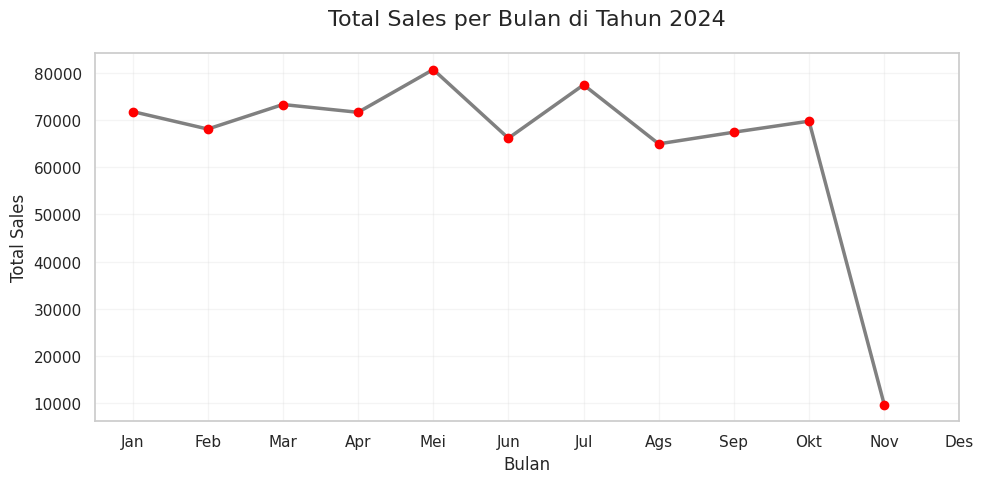

In [66]:
# Filter hanya data tahun 2024
sales_2024 = merch_sales[merch_sales['Order Date'].dt.year == 2024].copy()

# Buat kolom bulan
sales_2024['Month'] = sales_2024['Order Date'].dt.month

# Hitung total sales per bulan
monthly_sales = sales_2024.groupby('Month')['Total Sales'].sum()

# Label bulan
months = ['Jan','Feb','Mar','Apr','Mei','Jun','Jul','Ags','Sep','Okt','Nov','Des']

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(
    x=monthly_sales.index,
    y=monthly_sales.values,
    color='grey',
    linewidth=2.5
)

# Marker
plt.plot(
    monthly_sales.index,
    monthly_sales.values,
    marker='o',
    linestyle='',
    color='red',
    markersize=6
)

# Visualisasi
plt.title('Total Sales per Bulan di Tahun 2024', fontsize=16, pad=20)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(range(1, 13), labels=months)
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()


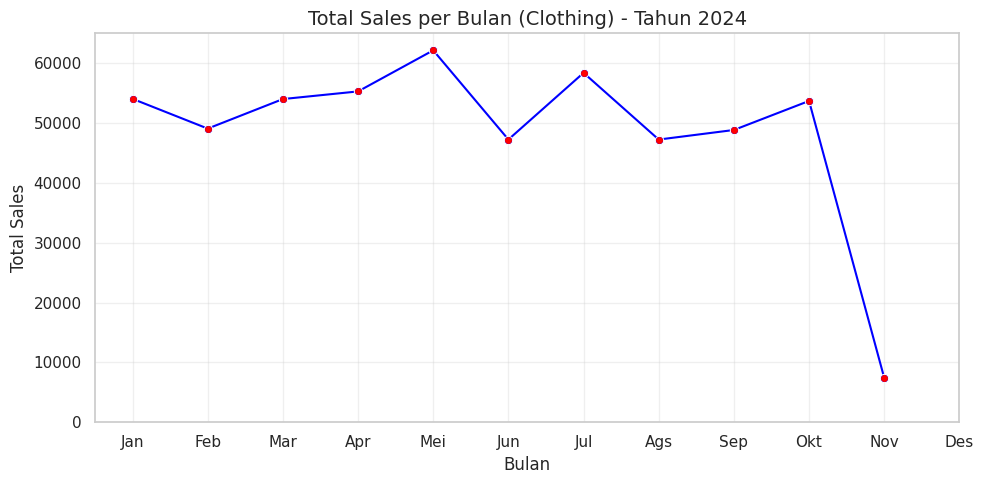

In [63]:
# Filter hanya data Clothing tahun 2024
product_sales = merch_sales[
    (merch_sales['Order Date'].dt.year == 2024) &
    (merch_sales['Product Category'] == 'Clothing')
].copy()

# Buat kolom bulan
product_sales['Month'] = product_sales['Order Date'].dt.month

# Hitung total sales per bulan
monthly_sales_product = product_sales.groupby('Month')['Total Sales'].sum()

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(
    x=monthly_sales_product.index,
    y=monthly_sales_product.values,
    marker='o',
    color='blue'
)

# Marker
plt.plot(
    monthly_sales_product.index,
    monthly_sales_product.values,
    marker='o',
    linestyle='',
    color='red',
    markersize=4
)

plt.title('Total Sales per Bulan (Clothing) - Tahun 2024', fontsize=14)
plt.xlabel('Bulan')
plt.ylabel('Total Sales')
plt.xticks(range(1, 13), labels=months)
plt.ylim(0, 65000)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


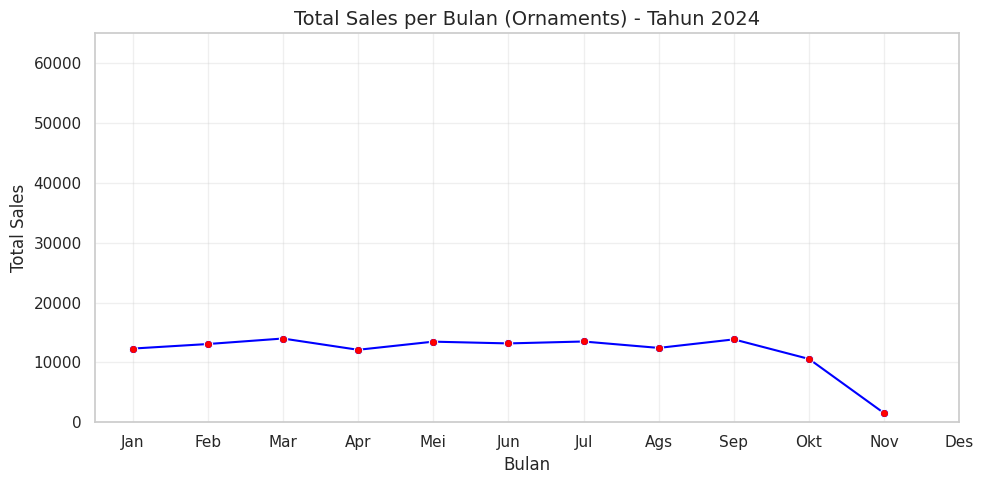

In [64]:
# Filter hanya data Clothing tahun 2024
product_sales = merch_sales[
    (merch_sales['Order Date'].dt.year == 2024) &
    (merch_sales['Product Category'] == 'Ornaments')
].copy()

# Buat kolom bulan
product_sales['Month'] = product_sales['Order Date'].dt.month

# Hitung total sales per bulan
monthly_sales_product = product_sales.groupby('Month')['Total Sales'].sum()

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(
    x=monthly_sales_product.index,
    y=monthly_sales_product.values,
    marker='o',
    color='blue'
)

# Marker
plt.plot(
    monthly_sales_product.index,
    monthly_sales_product.values,
    marker='o',
    linestyle='',
    color='red',
    markersize=4
)

plt.title('Total Sales per Bulan (Ornaments) - Tahun 2024', fontsize=14)
plt.xlabel('Bulan')
plt.ylabel('Total Sales')
plt.xticks(range(1, 13), labels=months)
plt.ylim(0, 65000)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


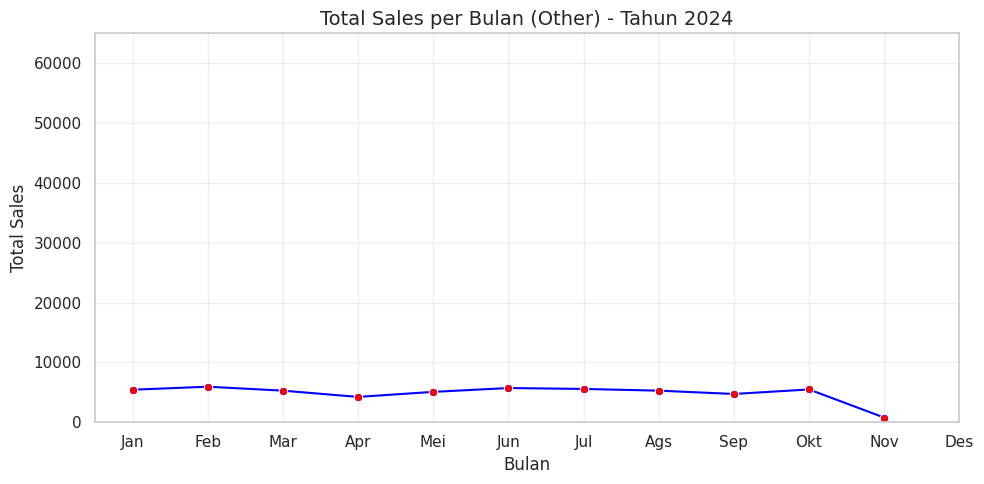

In [65]:
# Filter hanya data Clothing tahun 2024
product_sales = merch_sales[
    (merch_sales['Order Date'].dt.year == 2024) &
    (merch_sales['Product Category'] == 'Other')
].copy()

# Buat kolom bulan
product_sales['Month'] = product_sales['Order Date'].dt.month

# Hitung total sales per bulan
monthly_sales_product = product_sales.groupby('Month')['Total Sales'].sum()

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(
    x=monthly_sales_product.index,
    y=monthly_sales_product.values,
    marker='o',
    color='blue'
)

# Marker
plt.plot(
    monthly_sales_product.index,
    monthly_sales_product.values,
    marker='o',
    linestyle='',
    color='red',
    markersize=4
)

plt.title('Total Sales per Bulan (Other) - Tahun 2024', fontsize=14)
plt.xlabel('Bulan')
plt.ylabel('Total Sales')
plt.xticks(range(1, 13), labels=months)
plt.ylim(0, 65000)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


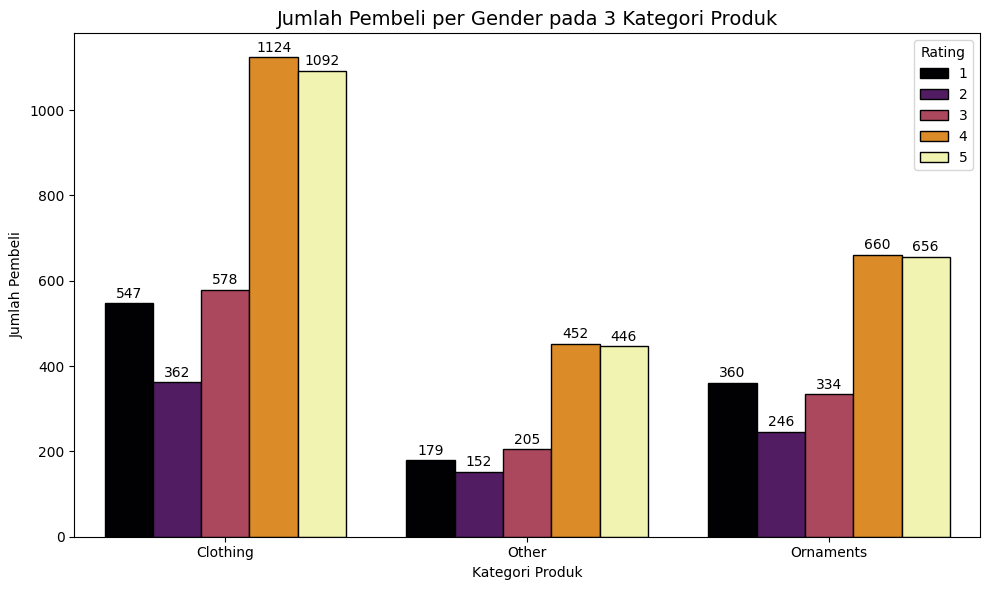

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ambil hanya 3 kategori produk yang ingin ditampilkan
top_3_categories = merch_sales['Product Category'].value_counts().nlargest(3).index
filtered_data = merch_sales[merch_sales['Product Category'].isin(top_3_categories)]

# Buat bar chart
plt.figure(figsize=(10,6))
ax = sns.countplot(
    data=filtered_data,
    x='Product Category',
    hue='Rating',
    palette='inferno',
    edgecolor='black'
)

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(
            f'{int(p.get_height())}',
            (p.get_x() + p.get_width()/2., p.get_height()),
            ha='center',
            va='center',
            xytext=(0, 7),
            textcoords='offset points'
        )


plt.title('Jumlah Pembeli per Gender pada 3 Kategori Produk', fontsize=14)
plt.xlabel('Kategori Produk')
plt.ylabel('Jumlah Pembeli')
plt.legend(title='Rating')
plt.tight_layout()
plt.show()


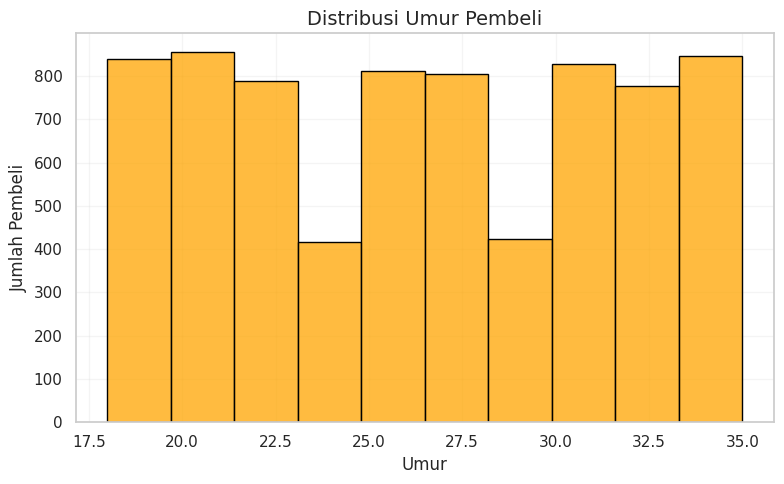

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(data=merch_sales, x='Buyer Age', bins=10, color='orange', edgecolor='black')

plt.title('Distribusi Umur Pembeli', fontsize=14)
plt.xlabel('Umur')
plt.ylabel('Jumlah Pembeli')
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()
